In [ ]:
from generate_stats import analyze_single_prompt, MeddocanAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


metrics = analyze_single_prompt(
    gold_dir="test/xml",
    system_dir="procesados_meddocan/systemLlama3.3/etiquetado/prompt8",
    output_file="errores.txt",
    prompt_name="Prompt 8"
)

df_metrics = pd.DataFrame.from_dict(metrics, orient='index')

# Agregar asterisco a los tags sin ningún caso (TP + FN = 0)
renamed_index = []
for tag in df_metrics.index:
    total = metrics[tag]['tp'] + metrics[tag]['fn']
    print(tag, total)
    new_name = f"{tag} *" if total == 0 else tag
    renamed_index.append(new_name)

df_metrics.index = renamed_index

# Solo columnas numéricas
heatmap_data = df_metrics[['precision', 'recall', 'f1']]

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap de métricas por etiqueta")
plt.xlabel("Métrica")
plt.ylabel("Etiqueta")
plt.tight_layout()
plt.show()


Matriz de confusión guardada en: results/confusion_matrix_prompt_8.png


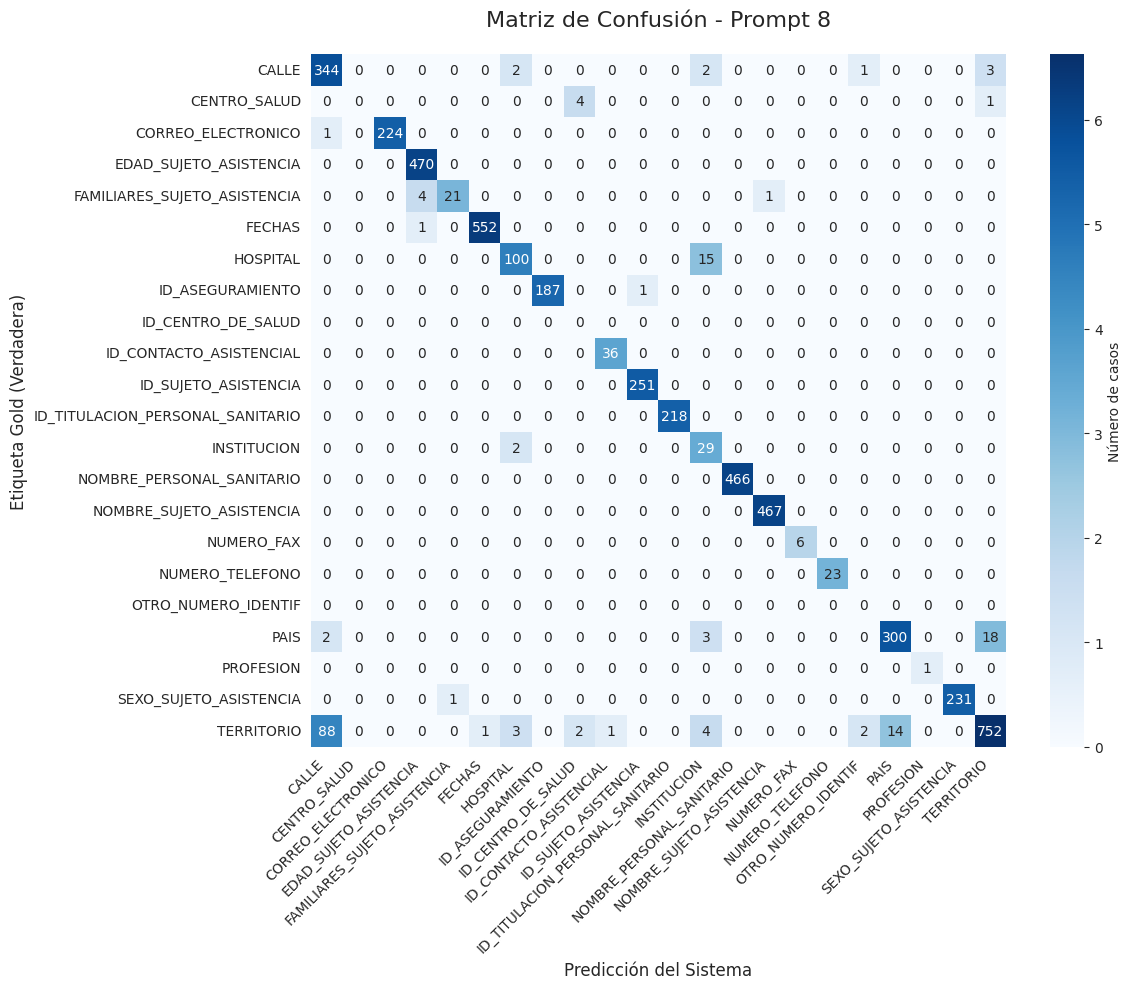

(array([[344,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   2,
           0,   0,   0,   0,   1,   0,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   1],
        [  1,   0, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 470,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   4,  21,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   1,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   1,   0, 552,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0,   0,   0,  15,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 187,   0,   0,   1,   0,   0,
           0,   0,   0,

In [2]:
analyzer = MeddocanAnalyzer()

metrics = analyzer.analyze_annotations(
    gold_dir="test/xml",
    system_dir="procesados_meddocan/systemLlama3.3/etiquetado/prompt8",
    prompt_name="Prompt 8"
)
analyzer.plot_confusion_matrix("Prompt 8", "./results")
